# Evaluation de nos estimations

---
**Aymen.B**

Je me repose sur l'article *"Training a neural network for data interpretation and better generalization: towards intelligent artificial intelligence"* de **Sylvain Sardy**, **Maxime van Cutsem** and **Xiaoyu Ma**

## Probabilité de récupérer l'exact support (PESR)

le **support** d'un vecteur de coefficients $\beta^* = (\beta^*_1, \beta^*_2, \ldots, \beta^*_p)$ est l'ensemble des indices correspondant aux coefficients non nuls.  Soit :

$$
\mathcal{S}^*(\beta) = \{j \in \{1, \ldots, p\} \mid \beta_j \neq 0\}
$$

On dit que l'on récupère exactement le support lorsque le support estimé $\widehat{\mathcal{S}}$ est identique au support réel $\mathcal{S}^*$.

On calcul alors cette probabilité de récuppérer le support exact (PESR) :
$$\mathrm{PESR}:=\mathbb{P}(\hat{\mathcal{S}}=\mathcal{S}^*)$$

In [1]:
from linear_tools import pesr

beta = [10, 10, 10, 0.0, 0.0, 0.0, 0.0]
beta_hat_1 = [9.81, 8.99, 10.15, 0.0, 0.0, 0.0, 0.0]
beta_hat_2 = [9.81, 8.99, 10.15, 0.1, 0.0, 0.0, 0.0]

# Test case 1: Perfect support match
pesr_1 = pesr(beta, beta_hat_1)
print("Test 1 - Perfect support match")
print(f"beta     : {beta}")
print(f"beta_hat : {beta_hat_1}")
print(f"PESR     : {pesr_1}\n")

# Test case 2: false positive
pesr_2 = pesr(beta, beta_hat_2)
print("Test 2 - With false positive")
print(f"beta     : {beta}")
print(f"beta_hat : {beta_hat_2}")
print(f"PESR     : {pesr_2}\n")

Test 1 - Perfect support match
beta     : [10, 10, 10, 0.0, 0.0, 0.0, 0.0]
beta_hat : [9.81, 8.99, 10.15, 0.0, 0.0, 0.0, 0.0]
PESR     : 1

Test 2 - With false positive
beta     : [10, 10, 10, 0.0, 0.0, 0.0, 0.0]
beta_hat : [9.81, 8.99, 10.15, 0.1, 0.0, 0.0, 0.0]
PESR     : 0



## F1-Score

On définit :  
- $TP$ (True Positives) : nombre de variables vraiment non nulles correctement détectées.  
- $FP$ (False Positives) : nombre de variables détectées comme non nulles alors qu’elles sont en réalité nulles.  
- $FN$ (False Negatives) : nombre de variables estimées nulles alors qu’elles sont en réalité non nulles.

À partir de ces quantités, on peut calculer deux ratios importants :

- **TPR** (True Positive Rate, ou rappel) :  
    $$
    \mathrm{TPR} = \frac{TP}{TP + FN} = \frac{|\hat{\mathcal{S}}\cap\mathcal{S}^{*}|}{|\mathcal{S}^{*}|}
    $$
    Il mesure la proportion de vraies variables non nulles correctement retrouvées.

- **FDR** (False Discovery Rate) :  
    $$
    \mathrm{FDR} = \frac{FP}{TP + FP} = \frac{|\hat{\mathcal{S}}\cap\bar{S}^{*}|}{|\hat{\mathcal{S}}|}
    $$
    Il mesure la proportion de fausses découvertes parmi toutes les variables détectées comme non nulles.

Pour évaluer la qualité globale de la sélection du support, on utilise souvent le **score $F_1$**, qui offre un bon compromis entre la capacité à retrouver toutes les vraies variables pertinentes (TPR) et la limitation des fausses découvertes (FDR).

$$
F_1=\frac{2\mathrm{TP}}{2\mathrm{TP}+\mathrm{FP}+\mathrm{FN}}
$$

In [2]:
from linear_tools import tp, fp, fn, tpr, fdr, f1

beta = [10, 10, 10, 0.0, 0.0, 0.0, 0.0]
beta_hat_1 = [9.81, 8.99, 10.15, 0.0, 0.0, 0.0, 0.0]
beta_hat_2 = [9.81, 8.99, 10.15, 0.1, 0.0, 0.0, 0.0]

# Test case 1: Perfect support match
print("Test 1 - Perfect support match")
print(f"beta     : {beta}")
print(f"beta_hat : {beta_hat_1}")

print(f"TP       : {tp(beta, beta_hat_1)}")
print(f"FP       : {fp(beta, beta_hat_1)}")
print(f"FN       : {fn(beta, beta_hat_1)}")

print(f"TPR      : {tpr(beta, beta_hat_1)}")
print(f"FDR      : {fdr(beta, beta_hat_1)}")
print(f"F1 Score : {f1(beta, beta_hat_1)}\n")

# Test case 2: False positive case
print("Test 2 - With false positive")
print(f"beta     : {beta}")
print(f"beta_hat : {beta_hat_2}")

print(f"TP       : {tp(beta, beta_hat_2)}")
print(f"FP       : {fp(beta, beta_hat_2)}")
print(f"FN       : {fn(beta, beta_hat_2)}")

print(f"TPR      : {tpr(beta, beta_hat_2)}")
print(f"FDR      : {fdr(beta, beta_hat_2)}")
print(f"F1 Score : {f1(beta, beta_hat_2)}")

Test 1 - Perfect support match
beta     : [10, 10, 10, 0.0, 0.0, 0.0, 0.0]
beta_hat : [9.81, 8.99, 10.15, 0.0, 0.0, 0.0, 0.0]
TP       : 3
FP       : 0.0
FN       : 0.0
TPR      : 1.0
FDR      : 0.0
F1 Score : 1.0

Test 2 - With false positive
beta     : [10, 10, 10, 0.0, 0.0, 0.0, 0.0]
beta_hat : [9.81, 8.99, 10.15, 0.1, 0.0, 0.0, 0.0]
TP       : 3
FP       : 1
FN       : 0.0
TPR      : 1.0
FDR      : 0.25
F1 Score : 0.8571428571428571


## Affichage des résultats

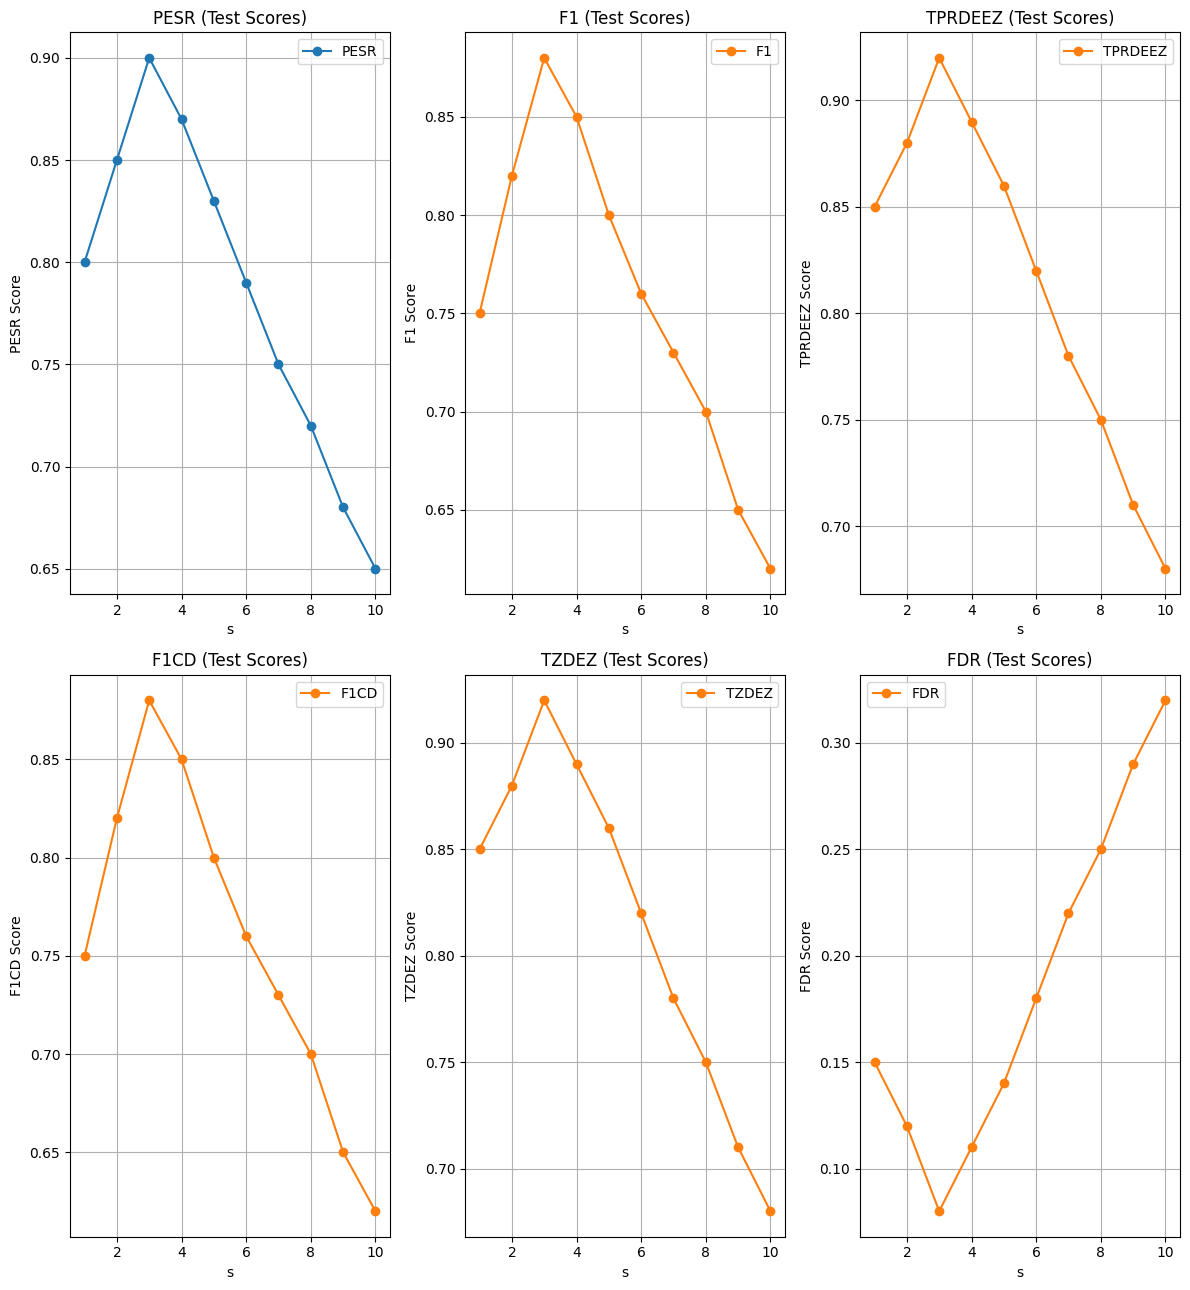

In [7]:
from linear_tools import plot_scores

# Create sample data
x_range = list(range(1, 11))
scores = {
    'pesr': [0.8, 0.85, 0.9, 0.87, 0.83, 0.79, 0.75, 0.72, 0.68, 0.65],
    'f1': [0.75, 0.82, 0.88, 0.85, 0.80, 0.76, 0.73, 0.70, 0.65, 0.62],
    'tprdeez': [0.85, 0.88, 0.92, 0.89, 0.86, 0.82, 0.78, 0.75, 0.71, 0.68],
    'f1cd': [0.75, 0.82, 0.88, 0.85, 0.80, 0.76, 0.73, 0.70, 0.65, 0.62],
    'tzdez': [0.85, 0.88, 0.92, 0.89, 0.86, 0.82, 0.78, 0.75, 0.71, 0.68],
    'fdr': [0.15, 0.12, 0.08, 0.11, 0.14, 0.18, 0.22, 0.25, 0.29, 0.32]
}

# Test the function
plot_scores(scores, x_range, "Test Scores")